Exploratory data analysis (EDA)

importing important packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

importing nessessary scripts

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plot import Plots as plot

In [4]:
df = pd.read_csv("../data/driver_locations_during_request.csv")

In [5]:
# printing the shape of the data
print(f'shape: {df.shape}, size: {df.size}')

shape: (1557740, 8), size: 12461920


Check for missing values and duplicates

In [6]:
# using duplicated method to check if there are any duplicates
df.duplicated().value_counts()

False    1557740
dtype: int64

In [7]:
df.isna().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

Univarite analysis

In [8]:
# unique value counts
unique_counts = df['order_id'].nunique()
unique_counts

26492

From the dataset having 1557740 there are only 26492 unique orders 
other than this orders it is redundant because maybe it is accepted or rejected by another driver

In [9]:
unique_counts = df['driver_id'].nunique()
unique_counts

1213

In this data set there are 1213 drivers participating in the delivery service.

In [10]:
unique_counts = df['driver_action'].nunique()
unique_counts

2

There are 2 actions that a driver takes for a specific order

In [11]:
counts_df = df['driver_action'].value_counts()
counts_df

rejected    1531837
accepted      25903
Name: driver_action, dtype: int64

From all those orders the drivers rejected 1531837 orders and accepted 25903 orders.

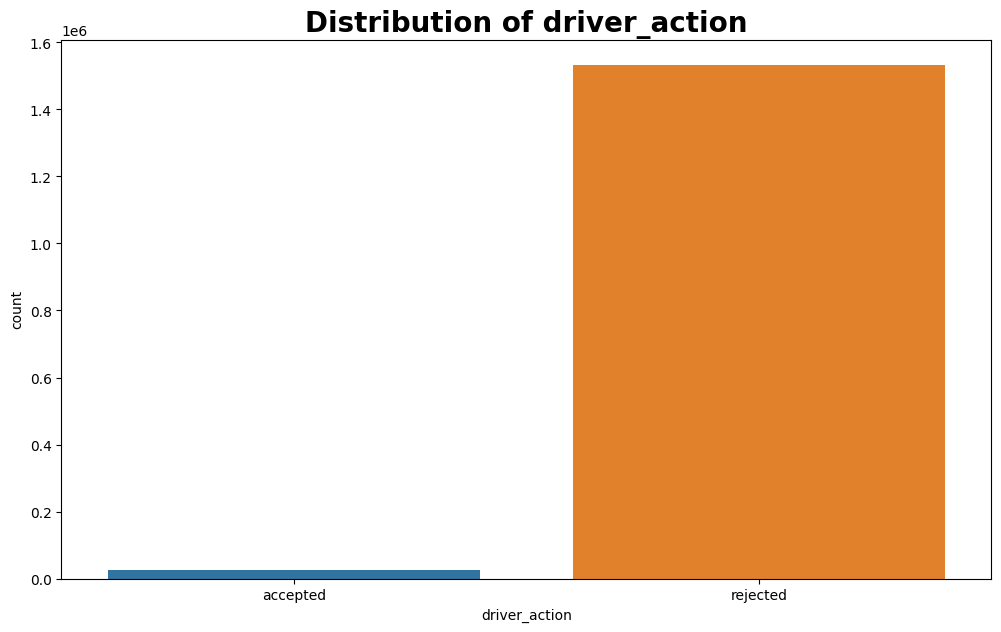

In [12]:
plot.plot_count(df, 'driver_action')

Now we checked that both created_at and updated_at columns are empty so we can
just drop them.

In [13]:
df.drop('created_at', inplace=True, axis=1)
df.drop('updated_at', inplace=True, axis=1)

In [14]:
order_driver_rln = df.loc[:,['driver_id','order_id']]
order_driver_corr = order_driver_rln.corr()
order_driver_corr.head()

,driver_id,order_id
driver_id,1.000000,0.023262
order_id,0.023262,1.000000


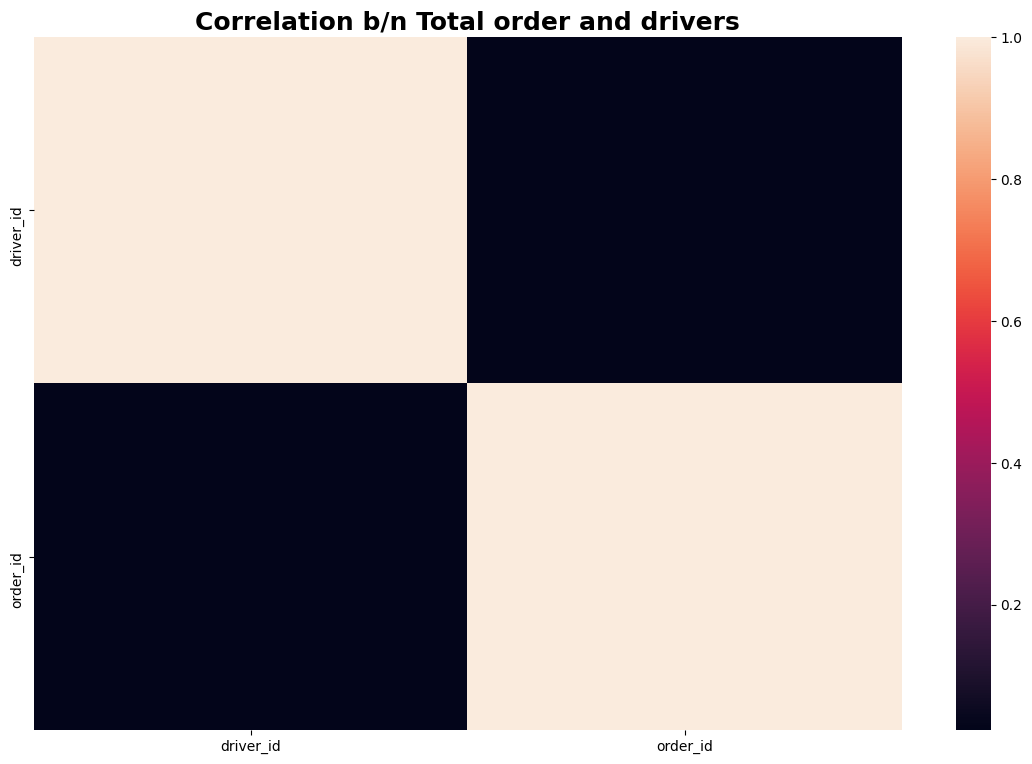

In [15]:
plot.plot_heatmap_from_correlation(order_driver_corr, 'Correlation b/n Total order and drivers')

In [24]:
accepted_order = df[df['driver_action']=='accepted']

In [25]:
accepted_order.to_csv('../data/clean_driver_data.csv', index=False)